In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
# Load the dataset
gdp = pd.read_csv('/Users/user/Downloads/RealGDP.csv')

# Preview the first few rows
gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [22]:
import pandas as pd

# Load the data
gdp_df = pd.read_csv("/Users/user/Downloads/RealGDP.csv")

# Step 1: Reshape the dataframe to long format
gdp_long = pd.melt(gdp_df, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'],
                   var_name='Quarter', value_name='GDP')

# Step 2: Convert GDP to numeric in case of commas or errors
gdp_long['GDP'] = pd.to_numeric(gdp_long['GDP'], errors='coerce')

# Step 3: Map each quarter to a month
quarter_month_map = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
gdp_long['Month'] = gdp_long['Quarter'].map(quarter_month_map)

# Step 4: Combine Year and Month to create a proper Date
gdp_long['Date'] = pd.to_datetime(gdp_long['Year'].astype(str) + '-' + gdp_long['Month'])

# View the cleaned data
gdp_long.head()


,Year,Quarter,GDP,Month,Date
0,2014,Q1,15438679.50,01,2014-01-01
1,2015,Q1,16050601.38,01,2015-01-01
2,2016,Q1,15943714.54,01,2016-01-01
3,2017,Q1,15797965.83,01,2017-01-01
4,2018,Q1,16096654.19,01,2018-01-01


In [24]:
# Map quarters to corresponding starting months
quarter_month_map = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Replace Quarter values with the corresponding month
gdp_long['Month'] = gdp_long['Quarter'].map(quarter_month_map)

# Create a combined date column in YYYY-MM format
gdp_long['Date'] = pd.to_datetime(gdp_long['Year'].astype(str) + '-' + gdp_long['Month'])

# Preview cleaned data
gdp_long.head()

,Year,Quarter,GDP,Month,Date
0,2014,Q1,15438679.50,01,2014-01-01
1,2015,Q1,16050601.38,01,2015-01-01
2,2016,Q1,15943714.54,01,2016-01-01
3,2017,Q1,15797965.83,01,2017-01-01
4,2018,Q1,16096654.19,01,2018-01-01


In [30]:
gdp_long

,Year,Quarter,GDP,Month,Date
0,2014,Q1,15438679.50,01,2014-01-01
1,2015,Q1,16050601.38,01,2015-01-01
2,2016,Q1,15943714.54,01,2016-01-01
3,2017,Q1,15797965.83,01,2017-01-01
4,2018,Q1,16096654.19,01,2018-01-01
5,2019,Q1,16434552.65,01,2019-01-01
6,2020,Q1,16740000.00,01,2020-01-01
7,2014,Q2,16084622.31,04,2014-04-01
8,2015,Q2,16463341.91,04,2015-04-01
9,2016,Q2,16218542.41,04,2016-04-01


In [58]:
gdp_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     28 non-null     int64         
 1   Quarter  28 non-null     object        
 2   GDP      28 non-null     float64       
 3   Month    28 non-null     object        
 4   Date     28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [60]:
gdp_long.describe()

,Year,GDP,Date
count,28.0000,2.800000e+01,28
mean,2017.0000,1.657996e+07,2017-05-16 18:51:25.714285824
min,2014.0000,0.000000e+00,2014-01-01 00:00:00
25%,2015.0000,1.609365e+07,2015-09-08 00:00:00
50%,2017.0000,1.683572e+07,2017-05-16 12:00:00
75%,2019.0000,1.809860e+07,2019-01-23 12:00:00
max,2020.0000,1.953000e+07,2020-10-01 00:00:00
std,2.0367,3.438177e+06,NaN


In [62]:
gdp_long.shape

(28, 5)

In [36]:
gdp_long.isnull().sum()

Year       0
Quarter    0
GDP        0
Month      0
Date       0
dtype: int64

In [38]:
# Compute total annual GDP
annual_gdp = gdp_long.groupby('Year')['GDP'].sum().reset_index()
annual_gdp.columns = ['Year', 'Annual_GDP']
print(annual_gdp)

# Compute quarterly GDP trend (already in gdp_long)
quarterly_gdp = gdp_long[['Date', 'GDP']]

   Year   Annual_GDP
0  2014  67152785.84
1  2015  69023929.95
2  2016  67931235.93
3  2017  68490980.34
4  2018  69799941.95
5  2019  71390101.71
6  2020  50450000.00


In [40]:
# Separate pre-COVID and COVID years
pre_covid = annual_gdp[annual_gdp['Year'] <= 2019]
covid_period = annual_gdp[(annual_gdp['Year'] >= 2020) & (annual_gdp['Year'] <= 2021)]

# Display comparison
print("\nPre-COVID Years (2014–2019):")
print(pre_covid)

print("\nCOVID Years (2020–2021):")
print(covid_period)


Pre-COVID Years (2014–2019):
   Year   Annual_GDP
0  2014  67152785.84
1  2015  69023929.95
2  2016  67931235.93
3  2017  68490980.34
4  2018  69799941.95
5  2019  71390101.71

COVID Years (2020–2021):
   Year  Annual_GDP
6  2020  50450000.0


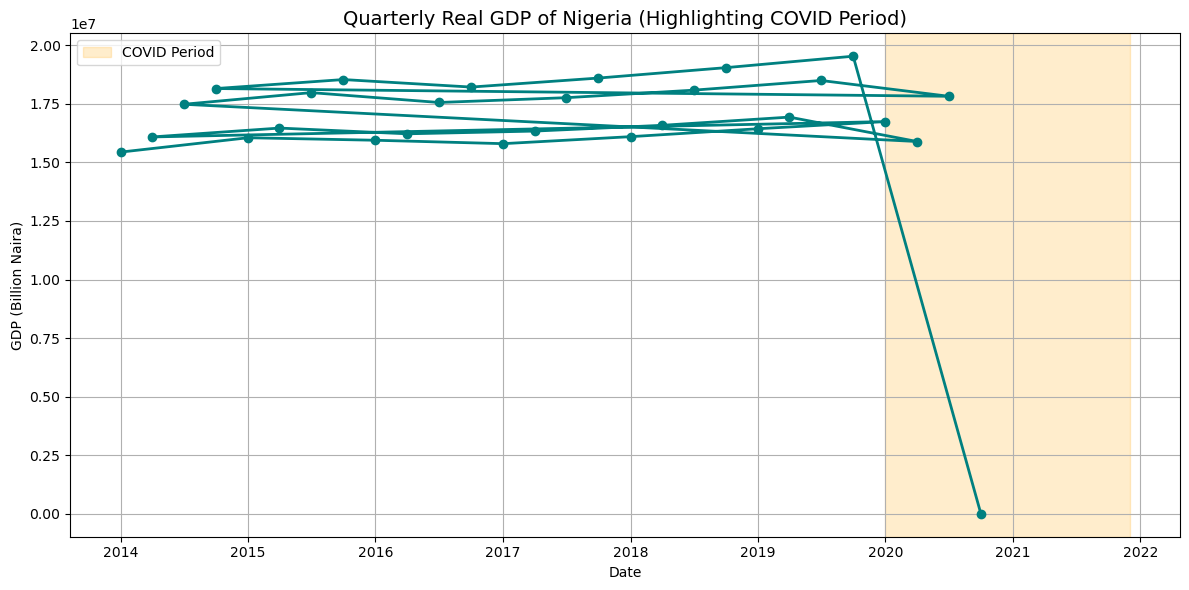

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(gdp_long['Date'], gdp_long['GDP'], marker='o', linewidth=2, color='teal')
plt.axvspan(pd.to_datetime('2020-01'), pd.to_datetime('2021-12'), color='orange', alpha=0.2, label='COVID Period')
plt.title('Quarterly Real GDP of Nigeria (Highlighting COVID Period)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('GDP (Billion Naira)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

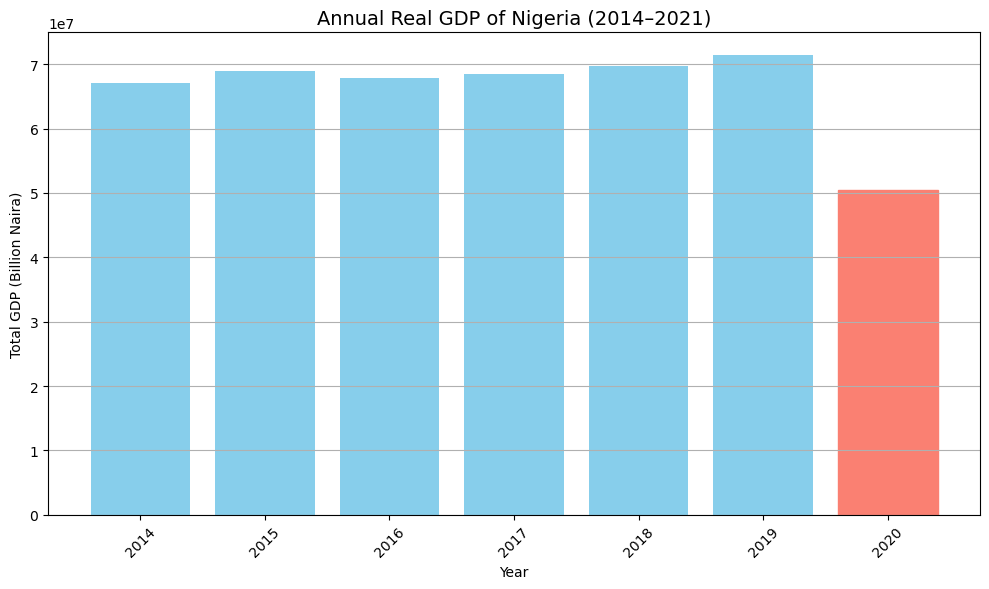

In [44]:
plt.figure(figsize=(10, 6))
bars = plt.bar(annual_gdp['Year'].astype(str), annual_gdp['Annual_GDP'], color='skyblue')

# Highlight COVID years in red
for bar, year in zip(bars, annual_gdp['Year']):
    if year >= 2020:
        bar.set_color('salmon')

plt.title('Annual Real GDP of Nigeria (2014–2021)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total GDP (Billion Naira)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
# GDP Growth Rate = (Current Year - Previous Year) / Previous Year * 100
annual_gdp['GDP_Growth_%'] = annual_gdp['Annual_GDP'].pct_change() * 100
annual_gdp = annual_gdp.round(2)  # Round for readability
print(annual_gdp)

   Year   Annual_GDP  GDP_Growth_%
0  2014  67152785.84           NaN
1  2015  69023929.95          2.79
2  2016  67931235.93         -1.58
3  2017  68490980.34          0.82
4  2018  69799941.95          1.91
5  2019  71390101.71          2.28
6  2020  50450000.00        -29.33


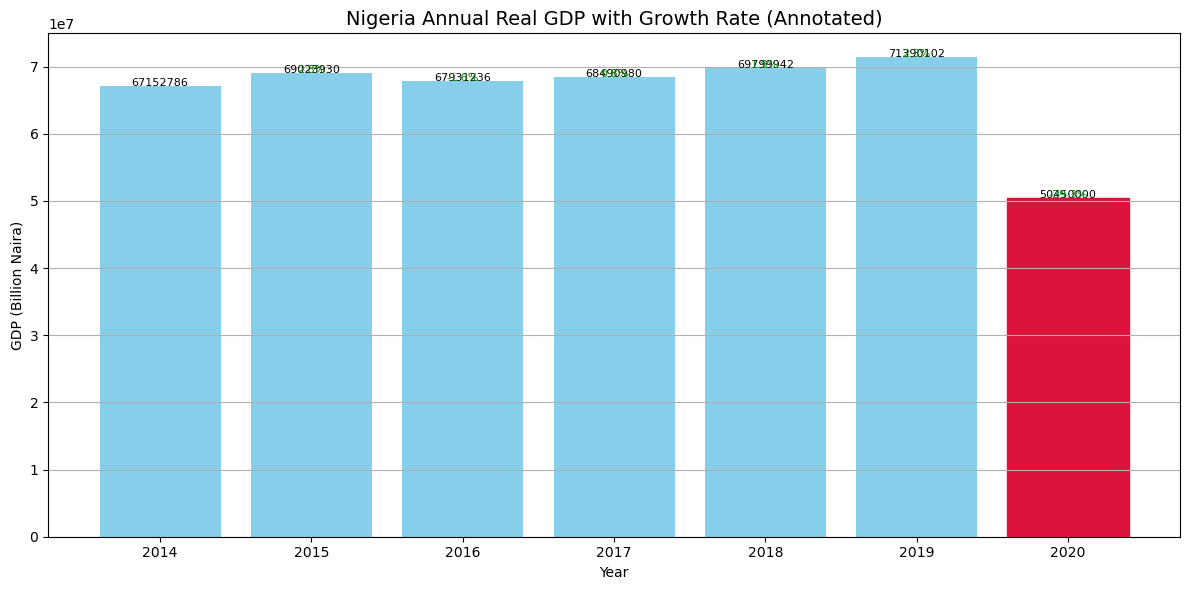

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.bar(annual_gdp['Year'].astype(str), annual_gdp['Annual_GDP'], color='skyblue')

# Highlight COVID years
for bar, year in zip(bars, annual_gdp['Year']):
    if year >= 2020:
        bar.set_color('crimson')

# Add GDP and growth % as annotations
for i, row in annual_gdp.iterrows():
    plt.text(i, row['Annual_GDP'] + 50, f"{row['Annual_GDP']:.0f}", ha='center', fontsize=8)
    if pd.notnull(row['GDP_Growth_%']):
        plt.text(i, row['Annual_GDP'] + 200, f"{row['GDP_Growth_%']:.1f}%", ha='center', fontsize=8, color='green')

plt.title('Nigeria Annual Real GDP with Growth Rate (Annotated)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('GDP (Billion Naira)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

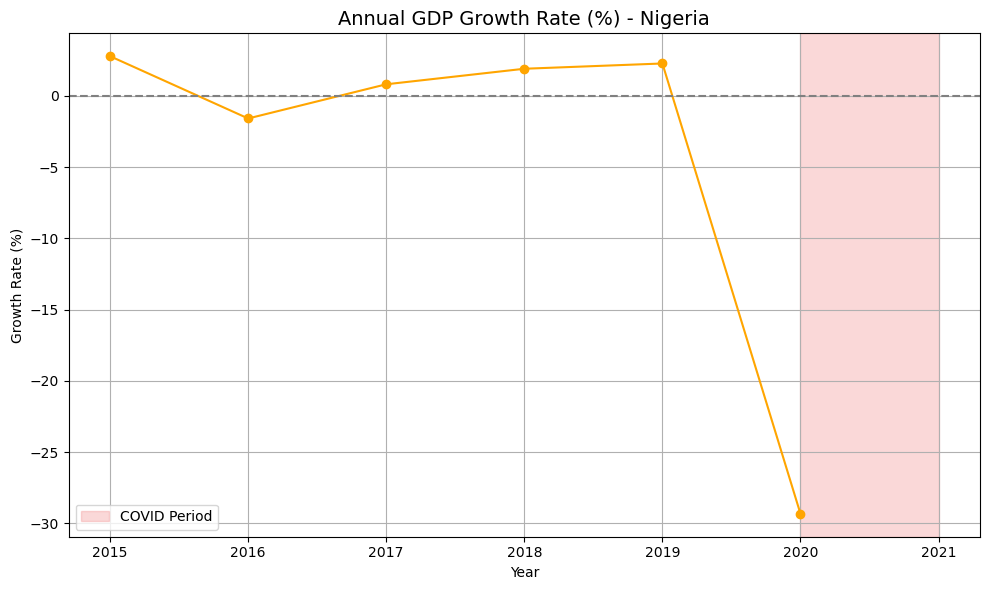

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(annual_gdp['Year'], annual_gdp['GDP_Growth_%'], marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--')

# Highlight COVID years
plt.axvspan(2020, 2021, color='lightcoral', alpha=0.3, label='COVID Period')

plt.title('Annual GDP Growth Rate (%) - Nigeria', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

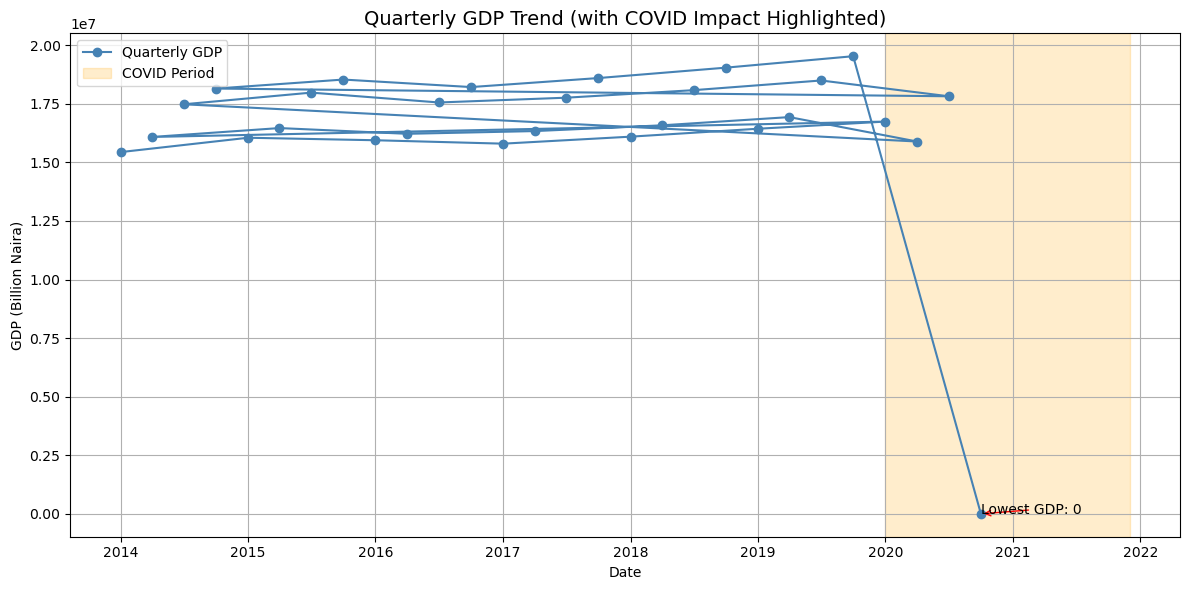

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(gdp_long['Date'], gdp_long['GDP'], marker='o', color='steelblue', label='Quarterly GDP')
plt.axvspan(pd.to_datetime('2020-01'), pd.to_datetime('2021-12'), color='orange', alpha=0.2, label='COVID Period')

# Annotate lowest GDP point during COVID
min_covid_gdp = gdp_long[(gdp_long['Date'] >= '2020') & (gdp_long['Date'] <= '2021')]['GDP'].min()
min_date = gdp_long[gdp_long['GDP'] == min_covid_gdp]['Date'].values[0]

plt.annotate(f'Lowest GDP: {min_covid_gdp:.0f}',
             xy=(pd.to_datetime(min_date), min_covid_gdp),
             xytext=(pd.to_datetime(min_date), min_covid_gdp + 200),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Quarterly GDP Trend (with COVID Impact Highlighted)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('GDP (Billion Naira)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

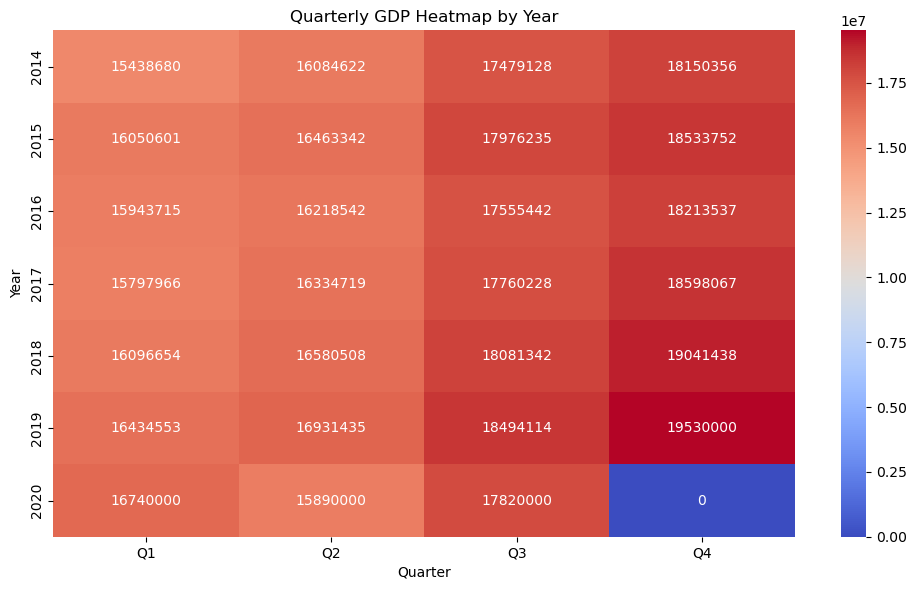

In [54]:
pivot = gdp_long.pivot_table(index='Year', columns='Quarter', values='GDP')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Quarterly GDP Heatmap by Year')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.tight_layout()
plt.show()